In [ ]:
# give me center lat, lon, slope, 
# return a, a+0.7, ..., a+0.7*14
#           a-0.7, ..., a-0.7*14

In [42]:
import utm
# 29.053188, -110.62982
lat_c = 42.441517 ; lon_c = -72.24398; slope = -7.7
e1, n1 , zone1, letter1 = utm.from_latlon(lat_c, lon_c)

In [43]:
e1, n1 , zone1, letter1

(726670.3582424226, 4702479.684271198, 18, 'T')

In [44]:
import math
theta = math.atan(slope)

In [45]:
e2 = e1 + 0.7*math.cos(theta)

In [46]:
n2 = n1 + 0.7*math.sin(theta)

In [47]:
import pandas as pd
import numpy as np
data = np.arange(-14, 15) # 0 --14
e_array = e1 + data * 0.7*math.cos(theta)
n_array = n1 + data * 0.7*math.sin(theta)
lat_, lon_ = utm.to_latlon(e_array, n_array, zone1, letter1)

In [59]:
coordinates = pd.DataFrame({'lat': lat_, 'lon': lon_})
coordinates_utm = pd.DataFrame({'e': e_array, 'n': n_array})


In [61]:
import folium
coordinates = pd.DataFrame({'lat': lat_, 'lon': lon_})
# Create a map centered around a specific location
m = folium.Map(location=[lat_c, lon_c],  zoom_start = 18, max_zoom = 21)
tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = True,
        control = True
       ).add_to(m)
# Add markers for each set of coordinates
for index, row in coordinates.iterrows():
    folium.Marker(location=row).add_to(m)
m

In [50]:
#  check ALS sites data
#lat_c, lon_c
# get als files 
import geopandas as gpd

# Specify the path to your GeoPackage file
gpkg_file = "../data/sites_20221006.gpkg"
# Read the GeoPackage file
gdf = gpd.read_file(gpkg_file)
# Now, gdf is a GeoDataFrame containing the data from the GeoPackage file

In [55]:
from shapely.geometry import Point
# Create a Point object representing the specific point
search_point = Point(lon_c, lat_c)  # Replace with the coordinates of your point
# Use the contains method to find polygons containing the point
contains_point = gdf[gdf.geometry.contains(search_point)]#.explode(index_parts= True)
#contains_point = contains_point[contains_point.geometry.contains(search_point)].explode(index_parts=False)
contains_point

,region,name,area_ha,geometry
123,usa,neon_harv2019,31294.000281,"POLYGON ((-72.27413 42.38063, -72.27413 42.380..."
173,usa,neon_harv2016,34963.649738,"MULTIPOLYGON (((-72.14617 42.36537, -72.14588 ..."
268,usa,neon_harv2017,30075.974205,"MULTIPOLYGON (((-72.28768 42.38323, -72.28763 ..."
291,usa,neon_harv,31389.617867,"POLYGON ((-72.26277 42.36908, -72.26277 42.369..."
360,usa,neon_harv2018,30028.841459,"MULTIPOLYGON (((-72.25468 42.38318, -72.25467 ..."


<Axes: >

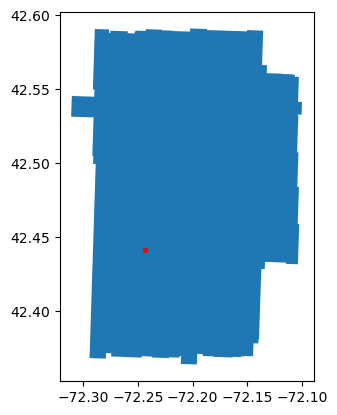

In [52]:
# Plot the GeoDataFrame
# lat_c = 29.039675; lon_c = -110.63119
geometry = [Point(xy) for xy in zip(lon_, lat_)]
point_gdf = gpd.GeoDataFrame(coordinates, geometry=geometry, crs='EPSG:4326')  # Use an appropriate CRS
#point_gdf.plot()
# Plot the GeoDataFrame
ax = contains_point.plot()
# # Plot the XY point on top of the GeoDataFrame plot
point_gdf.plot(ax=ax, marker='o', color='red', markersize=5, label='My Point')
# Display the plot

In [53]:
import os
# get als data folder
data_path = '/gpfs/data1/vclgp/data/gedi/imported/usa/neon_harv2019/LAZ_ground'
# Use os.listdir() to get a list of all files in the folder
# Get a list of all files in the folder
files = [file for file in os.listdir(data_path) 
         if os.path.isfile(os.path.join(data_path, file))]
print(len(files))

373


In [24]:
# Importing required module
import os
#os.system(f'pdal info {os.path.join(data_path, files[1])} --summary')
file = os.path.join(data_path, files[10])
#os.system(f'lasinfo -i {file} -stdout')

In [60]:
coordinates_utm.to_csv('coordinates.txt', sep=' ', header = False,  index = False)